# Introduction


The lender and the borrower share a precarious relationship – one of conservatism, legality, and – to a lesser extent today – trust. Within this relationship, the lender arguably has more to lose monetarily if the borrower defaults on their payment – the lender faces the loss of both the principal amount and the profit gained from interest payments. 

This presents a nuanced conundrum, whereby the lender’s approval or rejection of potential borrowers leads to a Schrödinger’s cat situation, where the approved borrower is either sub-par or not – to be determined when the borrower starts defaulting. This risk is known as credit risk, and is one of the greatest concerns of lending institutions – as informed by massive losses during the 2008 recession caused by wanton approval of sub-par mortgage loans – worsened by the ongoing economic impacts caused by the pandemic leading to higher unemployment and likelihood of default. 

The other issue arises that due to this “once bitten, twice shy” mentality, lending institutions are also likely to reject viable borrowers due to conservative procedures and systems – leading to a loss of potential profit and customer relationships.

Thus, the question arises to the problem of approving borrowers – how do we use the data available to us to develop measures and systems that are selective without being exclusive?


# Buisness POV

When considering MoneyLion’s situation, they are faced with different customers who may request a loan:
-	Existing customers (with a loan)
-	Existing customers (without a loan)
-	New customers (with loans)
-	New customers (without loans)
These customers will have their own credit history that will influence the decision whether to approve or reject, but the lender still adopts the Schrödinger’s cat of the loan resulting in profits, or the loan being defaulted upon. 

Ideally, the lender would only ever approve viable, profitable loans. In reality, the systems and measures implemented will result in both approval of sub-par and rejection of viable in certain situations. Thus MoneyLion faces several risks:
-	Rejecting viable loan applications due to conservative measures and systems, and losing potential profit. 
-	Approving sub-par loans, and making a loss.  
-	Losing customer relationships due to rejection. 
-	Worsening existing customer relationships due to rejection. 
-	Sub-par existing customers worsened relationship and/or account termination. 

Due to these risks, the business needs to consider other options and goals. 
-	The first is ideally to have proper measures to review customer data. Standardised procedures should be in place for initial checking (rejection of obvious triggers – prior defaulting, legal action etc.) and then more individualistic checking for those with less obvious rejection checks. 
-	Develop automated system for standardised checks
-	Develop machine learning apparatus to review historical data that can be updated with new information frequently to conduct behavioural analysis. 
-	For bank statement loans, automate checking for gambling/loan shark/unspecified loan symptoms
-	For non-bank statement loans, automate checking of credit reports (in Malaysia there is CCRIS and CTOS, application should be similar for America)
-	Refer to past borrowing history for new & existing customers with loans. For existing customers, refer to other financial activities – high speculative activity, lack of savings, strange deposits and withdrawals.

In [1]:
#pip install https://github.com/ydataai/pandas-profiling/archive/master.zip
# if does not work uninstall pandas_profiling and use conda 

In [2]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import geopandas
import pandas as pd
import seaborn as sns
from pprint import pprint
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
LOAN = "D:\DS Assessment (Intern)\data\data\loan.csv"
PAYMENT = "D:\DS Assessment (Intern)\data\data\payment.csv"
CLARITY = "D:\DS Assessment (Intern)\data\data\clarity_underwriting_variables.csv" 

In [4]:
#reading and parsing the dates 
df_loan = pd.read_csv(LOAN, parse_dates=['applicationDate', 'originatedDate'])
df_payment = pd.read_csv(PAYMENT, parse_dates=['paymentDate'])
df_clarity = pd.read_csv(CLARITY)

C:\Users\Zati Hakim\AppData\Local\Temp\ipykernel_592\3382719141.py:4: DtypeWarning: Columns (9,11,12,13,14,15,16,17,18,19,20,21,22,23,25,26,27,28,29,31,32,33,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df_clarity = pd.read_csv(CLARITY)


In [5]:
# joining csv files, multiple rows have same loanID because of multiple installments
df_ = pd.merge(df_loan, df_clarity, left_on="clarityFraudId", right_on="underwritingid", how="left")
df = pd.merge(df_, df_payment, left_on="loanId", right_on="loanId", how="left")

In [6]:
JOINED_DF = """D:\int\DS Assessment (Intern)-20220525T081644Z-001\DS Assessment (Intern)\data\data\payment1.csv"""
df.to_csv(JOINED_DF)

In [7]:
df = pd.read_csv(JOINED_DF, index_col=[0])
report = ProfileReport(df, title="Quick EDA", minimal=True, html={"style": {"full_width": True}})

In [8]:
report.to_notebook_iframe()
# Save the report 
report.to_file("""D:\DS Assessment (Intern)/report.html""")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

1. Initial :  At first we can already see that there are 81 variables in 3 categories. Additionally 46.8% of cells have missing value, which is nearly half 

2. LoanId : has 47.1% distinct values , due to multiple installments by esame loanID

3. PayFrequency : most customers tend to chooose paying bi-weekly shrortly followed by weekly,semi montly and irregular being so less can be assumed  because of not very financially stable customers working through paycheck to paycheck.

4. In the data apr section i believe shows the credit score of customers as the apr depends on credit score, the mean score was 536.5 which is considered BAD [Link](https://www.nerdwallet.com/article/loans/personal-loans/annual-percentage-rate-personal-loan), But the skewness is negative so most customers have average scores

5. 56.6% of loan request pass the first stage , but this does not means loan get approved as it is just initial stage

6. PaidOff section shows that majority of customers are new customers , 88.5% for this data. this leads to great difficulty predicting the probabilty of cutomer returning the loan or not

7. 56.2% get thier loans approved compared to 56.6 being approved in first stage

8. 54.8% loans are funded by moneylion which is 1.4% less than approved. One reason could be of cudtomer voiding the loan after getting approval.

9. 36.8 % of applications are withdrawn which cannot be used for the prediction model , out of rest paid off and setelment paid off makes up 16.6%. External and internal colelction means payments were quite overdue comprises of 25.4%. more information needed about rest of the categories.

10. most ofthe loan amounts are quite less with mean of 604 USD , this means most of the loans were taken for short payments like cars, devices etc rather than education or home loans 

12. Ohio and Illinios have taken most amont of loans with 16.3 and 12.1 respectively. can use basic salaries in states to compare for loans 

13. pingtree type leads the most common one making up 82% of lead types

14. ClarityFraudID I assume is the score of  how unclear the information submitted is . Also 73.2% customers have some score in clarity fraud

15. Clearfraudscore can be likelyhood of customer being fraudulent 

16. current installment varies from 1 to 105 , but also have 43.8% missing taht can either means they paid the loan all at once or didnt got approved as well as withdrawn the loan

17. only 1.1% of customers opt for custom made plan 

18. 22% of payment status was cancelled this i believe can either be because of cutomer not being able to pay or could be cancelled by money lion themselves. Can be explained by Payment returncode coulmn








In [9]:
df2= pd.read_csv(r"C:\Users\Zati Hakim\Desktop\GDP_Data.CSV")

df = pd.merge(df2, df, left_on="state", right_on="state", how="left")

df.head()


JOINED_DF = """D:\int\DS Assessment (Intern)-20220525T081644Z-001\DS Assessment (Intern)\data\data\payment1.csv"""
df.to_csv(JOINED_DF)





In [10]:
df.head()

state        GDP         loanId                          anon_ssn  \
0    AK  54,970.10  LL-I-12813448  7cebd891139dd0a8ddaf38f7bce42eff   
1    AK  54,970.10  LL-I-15016503  1d241f842438f4ac29e2dd1b1085a31b   
2    AK  54,970.10  LL-I-13218554  aef98a90f1639556c5d96b62842c034f   
3    AK  54,970.10  LL-I-14764759  5caf9e9382f660a6c537bf941a9fac9b   
4    AK  54,970.10  LL-I-12236476  b9fc569a13902aaa629195213982f74d   

  payFrequency    apr          applicationDate originated originatedDate  \
0            S  645.0  2016-12-09 22:07:59.796      False            NaN   
1            B  645.0  2017-01-11 15:26:25.387      False            NaN   
2            B  645.0  2016-12-16 00:51:40.569      False            NaN   
3            B  645.0  2017-01-10 20:45:41.764      False            NaN   
4            B  590.0  2016-11-26 23:40:12.966      False            NaN   

   nPaidOff  ... clearfraudscore  underwritingid installmentIndex  \
0       0.0  ...             NaN             NaN              NaN   
1       0.0  ...             NaN             NaN              NaN   
2       0.0  ...             NaN             NaN              NaN   
3       0.0  ...             NaN             NaN              NaN   
4       0.0  ...             NaN             NaN              NaN   

   isCollection  paymentDate principal  fees paymentAmount paymentStatus  \
0           NaN          NaN       NaN   NaN           NaN           NaN   
1           NaN          NaN       NaN   NaN           NaN           NaN   
2           NaN          NaN       NaN   NaN           NaN           NaN   
3           NaN          NaN       NaN   NaN           NaN           NaN   
4           NaN          NaN       NaN   NaN           NaN           NaN   

   paymentReturnCode  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  

[5 rows x 82 columns]

In [11]:
import geopandas
import pandas as pd
import seaborn as sns
from pprint import pprint
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [12]:
unique_loan_status = df_loan.loanStatus.unique()
pprint(unique_loan_status)

array(['Withdrawn Application', 'Paid Off Loan', 'Rejected', 'New Loan',
       'Internal Collection', 'CSR Voided New Loan',
       'External Collection', 'Returned Item', 'Customer Voided New Loan',
       'Credit Return Void', 'Pending Paid Off', 'Charged Off Paid Off',
       nan, 'Settled Bankruptcy', 'Settlement Paid Off', 'Charged Off',
       'Pending Rescind', 'Customver Voided New Loan',
       'Pending Application', 'Voided New Loan',
       'Pending Application Fee', 'Settlement Pending Paid Off'],
      dtype=object)


In [13]:
df_loan['loanStatus'].value_counts(normalize=True)

Withdrawn Application          0.781207
Rejected                       0.147361
Paid Off Loan                  0.019794
External Collection            0.019633
New Loan                       0.014052
Internal Collection            0.009643
Returned Item                  0.002047
CSR Voided New Loan            0.001777
Settlement Paid Off            0.001226
Credit Return Void             0.001219
Customer Voided New Loan       0.000873
Settled Bankruptcy             0.000565
Pending Paid Off               0.000293
Charged Off Paid Off           0.000277
Pending Application Fee        0.000009
Pending Rescind                0.000007
Pending Application            0.000007
Voided New Loan                0.000003
Charged Off                    0.000002
Customver Voided New Loan      0.000002
Settlement Pending Paid Off    0.000002
Name: loanStatus, dtype: float64

SO the main goal is to classifiy Loan as eithr paidoff or not paidoff , for that we can classifiy the columns in either positive (1) and negative class(2)

where:

1= "Paid Off Loan", "Settlement Paid Off"
2 = "Customver Voided New Loan", "Settled Bankruptcy","Charged Off", "Customer Voided New Loan"


we would also need to filetr out loans that are funded

In [14]:
classes = {
    1: ["Paid Off Loan", "Settlement Paid Off"],
    0: ["Customver Voided New Loan", "Settled Bankruptcy","Charged Off", "Customer Voided New Loan"] 
}

In [15]:
def map_classes(row):
  for key, value in classes.items():
    if row in value:
      return key

In [16]:
df_loan = df_loan[df_loan.isFunded == 1] # Filter loans that are funded 
df_loan['target'] = df_loan['loanStatus'].map(map_classes)

<AxesSubplot:title={'center':'Percentage of each class'}>

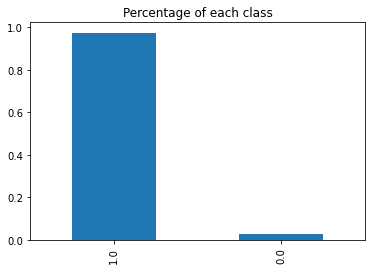

In [17]:
df_loan['target'].value_counts(normalize=True).plot(kind='bar', x='Class', title='Percentage of each class')

There seems to massive imablance of classes , leaning heavily towards the positive class which is good for  moneyLion but would create problems during data modelling . This can be tackled by SMOTE or EasyEnsemble to ensure the model is not biased towards the majority class which is the positive class.



In [18]:
df_loan['target'].value_counts(normalize=True)

1.0    0.973838
0.0    0.026162
Name: target, dtype: float64

In [19]:
df_loan.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38982 entries, 1 to 577662
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   loanId                            38982 non-null  object        
 1   anon_ssn                          38982 non-null  object        
 2   payFrequency                      38982 non-null  object        
 3   apr                               38982 non-null  float64       
 4   applicationDate                   38982 non-null  datetime64[ns]
 5   originated                        38982 non-null  bool          
 6   originatedDate                    38982 non-null  datetime64[ns]
 7   nPaidOff                          38961 non-null  float64       
 8   approved                          38982 non-null  bool          
 9   isFunded                          38982 non-null  int64         
 10  loanStatus                        38982 non-n

In [20]:
def plot_target_vs_col(df, col, lim=2000):
  """
  Plots categorical features vs the Default and Paid Off classes of 
  the target column
  """
  total = len(df)
  tmp = pd.crosstab(df[col], df['target'], normalize='index') * 100
  tmp = tmp.reset_index()
  tmp.rename(columns={0:'Default', 1:'Paid Off'}, inplace=True)
  
  plt.figure(figsize=(16,14))    
  plt.suptitle(f'{col} Distributions ', fontsize=24)
  
  plt.subplot(211)
  g = sns.countplot( x=col,  data=df, order=list(tmp[col].values))
  gt = g.twinx()
  gt = sns.pointplot(x=col, y='Paid Off', data=tmp, order=list(tmp[col].values),
                      color='black', legend=False, )
  gt.set_ylim(0,tmp['Paid Off'].max()*1.1)
  gt.set_ylabel("% Paid Off", fontsize=16)
  g.set_title(f"Most Frequent {col} values and % Paid Off Loans", fontsize=20)
  g.set_xlabel(f"{col} Category Names", fontsize=16)
  g.set_ylabel("Count", fontsize=17)
  g.set_xticklabels(g.get_xticklabels(),rotation=45)
  sizes = []
  for p in g.patches:
      height = p.get_height()
      sizes.append(height)
      g.text(p.get_x()+p.get_width()/2.,
              height + 3,
              '{:1.2f}%'.format(height/total*100),
              ha="center",fontsize=12) 
      
  g.set_ylim(0,max(sizes)*1.15)

  plt.subplot(212)
  g1 = sns.countplot( x=col,  data=df, order=list(tmp[col].values))
  g1t = g1.twinx()
  g1t = sns.pointplot(x=col, y='Default', data=tmp, order=list(tmp[col].values),
                      color='black', legend=False, )
  g1t.set_ylim(0,tmp['Default'].max()*1.1)
  g1t.set_ylabel("% Default", fontsize=16)
  g.set_xticklabels(g.get_xticklabels(),rotation=45)
  g1.set_title(f"Most Frequent {col} values and % Default Loans", fontsize=20)
  g1.set_xlabel(f"{col} Category Names", fontsize=16)
  g1.set_ylabel("Count", fontsize=17)
  g1.set_xticklabels(g.get_xticklabels(),rotation=45)
  sizes = []
  for p in g1.patches:
      height = p.get_height()
      sizes.append(height)
      g1.text(p.get_x()+p.get_width()/2.,
              height + 3,
              '{:1.2f}%'.format(height/total*100),
              ha="center",fontsize=12) 
      
  g1.set_ylim(0,max(sizes)*1.15)

  plt.subplots_adjust(hspace=.4, top = 0.9)
  plt.show()

In [21]:
list(df_loan)

['loanId',
 'anon_ssn',
 'payFrequency',
 'apr',
 'applicationDate',
 'originated',
 'originatedDate',
 'nPaidOff',
 'approved',
 'isFunded',
 'loanStatus',
 'loanAmount',
 'originallyScheduledPaymentAmount',
 'state',
 'leadType',
 'leadCost',
 'fpStatus',
 'clarityFraudId',
 'hasCF',
 'target']

plotting the categorical features with low cardinality to see the relationship they have with both values of the target values.

The first plot would be the categorical feature vs the % Paid Off Loans and the second one would be the same categorical feature vs the % Default on Loan

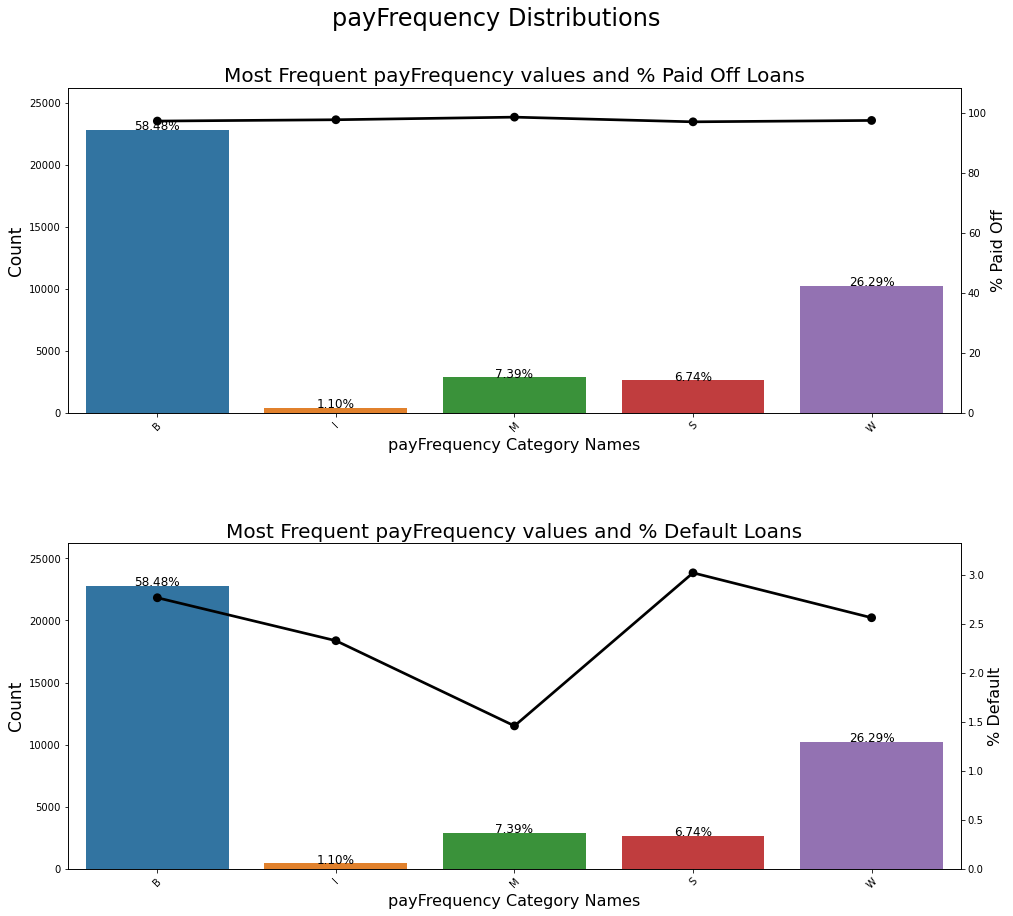

In [22]:
plot_target_vs_col(df_loan, 'payFrequency')

surpring result is people with irregular payments have lower % of default. One reason i can think of is itsmore flexible and the can pay according to frequency of thier income , as most people would have diffrent circumstances each month.

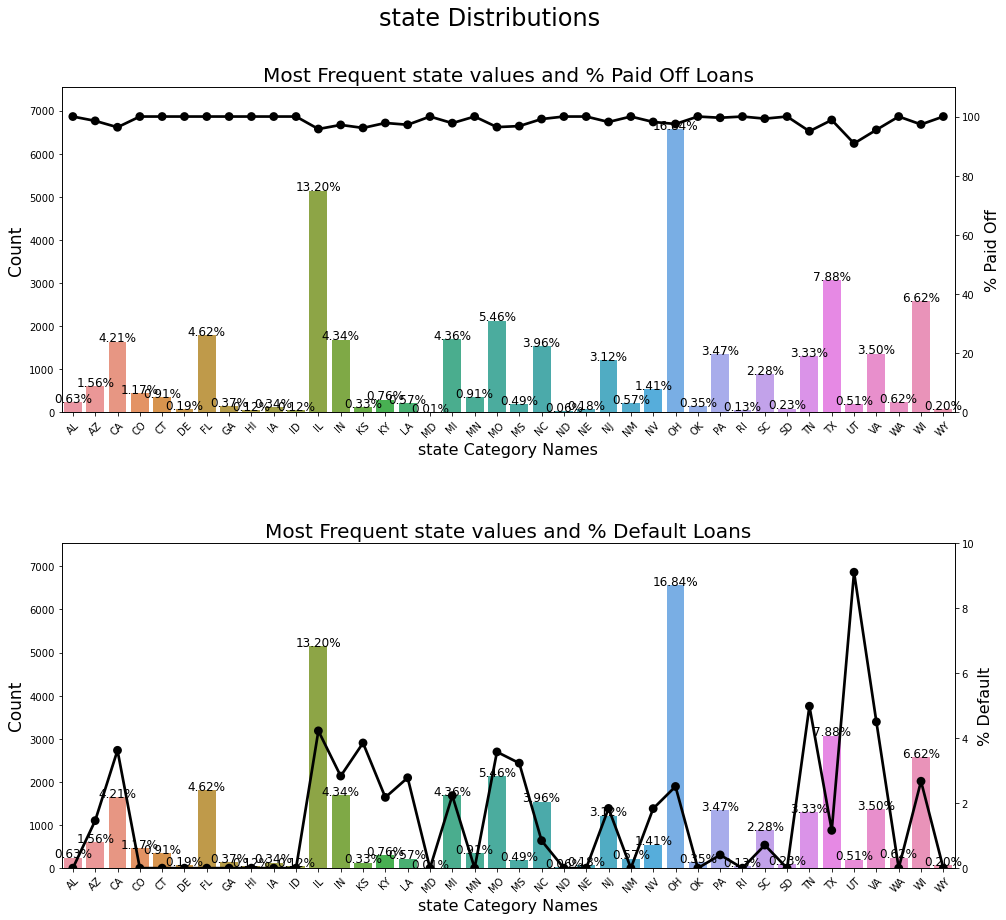

In [23]:
plot_target_vs_col(df_loan, 'state')

UT, TN and VA have an unusualy high %default, especially VA

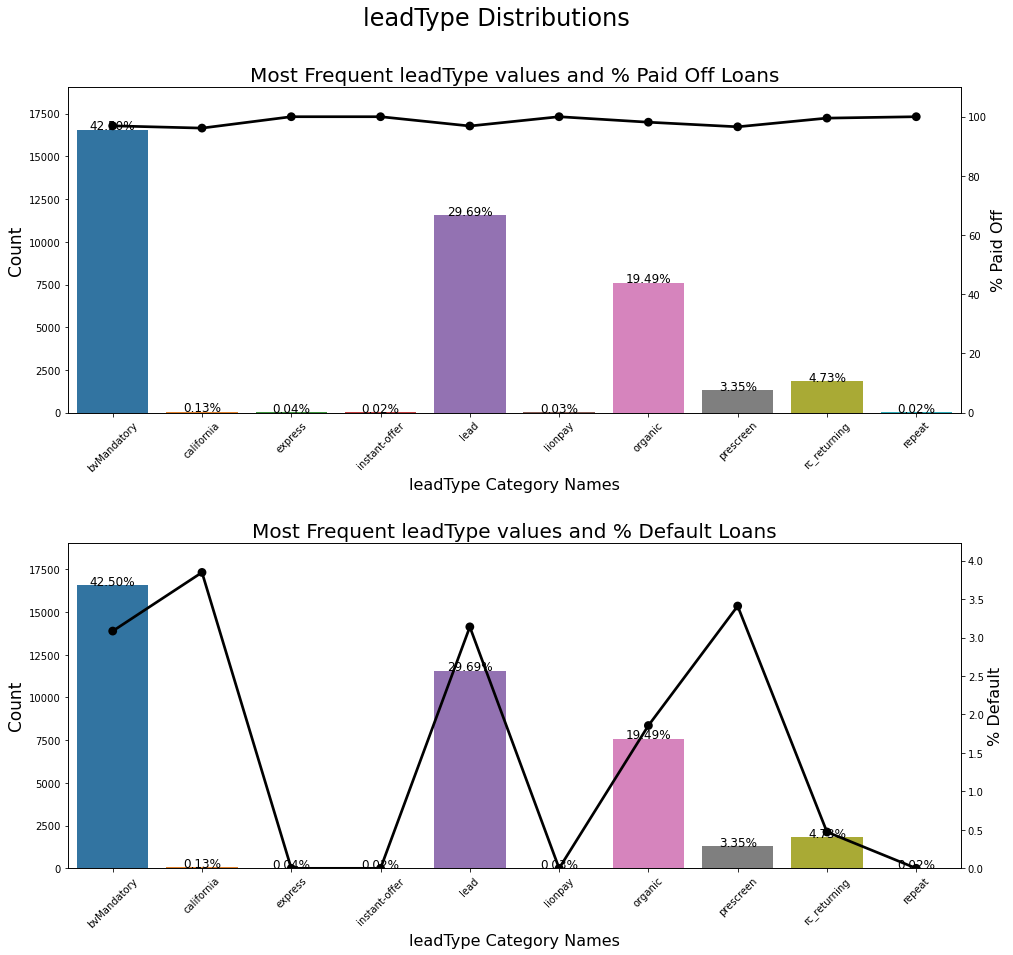

In [24]:
plot_target_vs_col(df_loan, 'leadType')

This result is something I expected as because LEAD type leads doesnot require much documentation lik BvMandatory so the %Default is high. It will be better if moneylion use more documentation at this lead type as well

In [25]:
# Join the loan data with the payment data only including the columns loanId and isCollection
df_ = pd.merge(df_loan, df_payment.loc[:, ["loanId", "isCollection"]], left_on="loanId", right_on="loanId", how="left")
df_['target'] = df_['loanStatus'].map(map_classes)

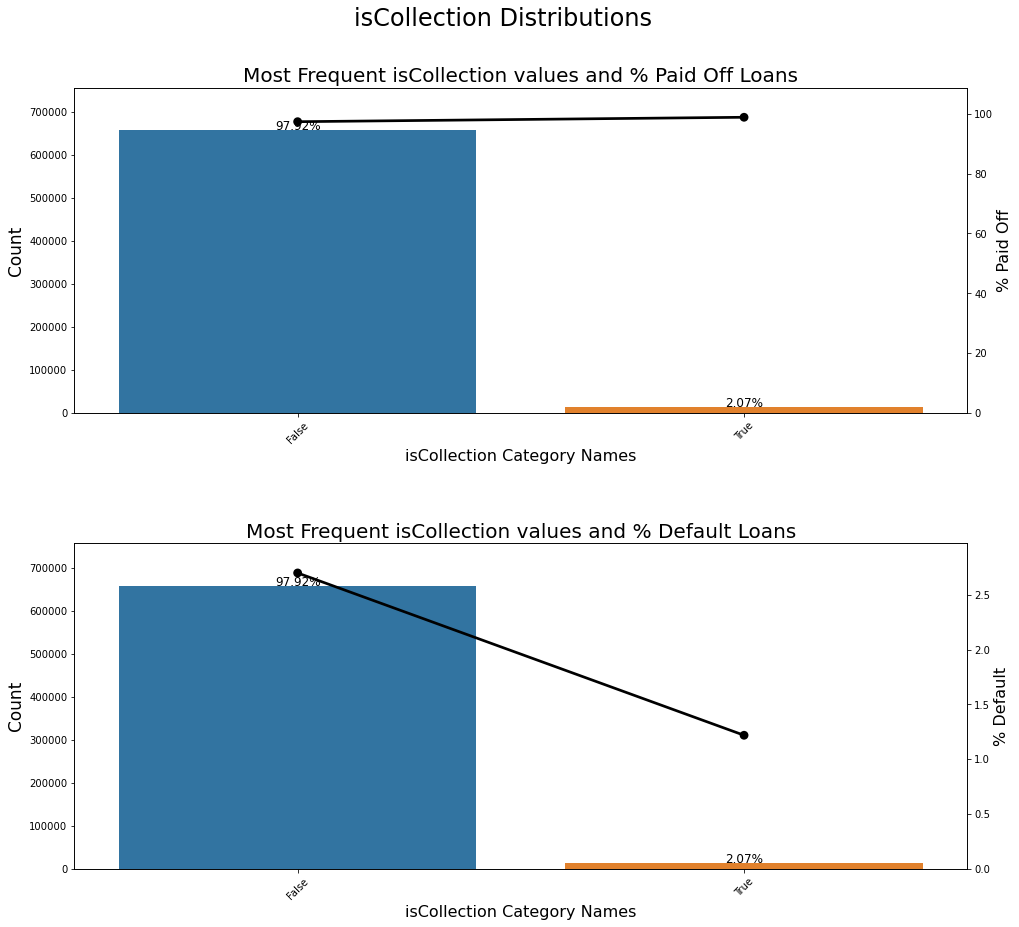

In [26]:
plot_target_vs_col(df_, 'isCollection')

Results seems to tell that %default decreases when plan is cutom made , this is understandable as each customer have diffrent life style and earnings

In [27]:
df_payment_amount= df_payment.groupby(["loanId"]).paymentAmount.agg(total_amount_paid = 'sum').reset_index()

df_ = pd.merge(df_, df_payment_amount, left_on="loanId", right_on="loanId", how="left").drop_duplicates('loanId').reset_index()

df_['remainder_to_pay'] = df_['originallyScheduledPaymentAmount'] - df_['total_amount_paid']

# Round the float columns 
df_ = df_.round(4)

df_.sample(10)

index         loanId                          anon_ssn payFrequency  \
28890  498647  LL-I-07595295  b8d50e5d4ef0809e673ddba916b896df            W   
27802  480103  LL-I-09306520  babd5875da96a83b9ebf423c90b64452            B   
21378  369491  LL-I-17045794  245fe56daa27d6d50f34292997421cb4            W   
11277  195612  LL-I-03407329  a2c848167d19ed2305bf136843c9bef6            B   
6046   104737  LL-I-12079418  674e04d66d606be16a36f7112145b4f8            B   
1316    22823  LL-I-08613062  2d43bea2f3389c2cf7d5e46d3f2a071f            B   
29448  508483  LL-I-13593601  465ca47bddf1dcef5d334d5ea50f1866            M   
26820  463228  LL-I-12821782  8431bfe385ee520b431b5d4d2b814161            B   
33373  576326  LL-I-12110806  5958e6d220c3407b5ffd9256a71c22de            B   
9900   171746  LL-I-10085434  00dfe8503603e61e41c391ce0779de2f            B   

         apr         applicationDate  originated          originatedDate  \
28890  590.0 2016-03-03 19:17:15.764        True 2016-03-03 20:30:47.940   
27802  449.0 2016-05-26 00:17:34.595        True 2016-05-26 20:08:58.865   
21378  360.0 2017-02-12 20:17:39.112        True 2017-02-12 21:45:06.481   
11277  590.0 2015-09-25 14:07:05.084        True 2015-09-25 14:21:37.543   
6046   360.0 2016-09-18 21:17:16.097        True 2016-09-18 22:06:55.929   
1316   360.0 2016-04-11 19:58:52.195        True 2016-04-13 20:16:08.363   
29448  645.0 2016-12-20 18:43:22.938        True 2016-12-20 20:36:33.177   
26820  645.0 2016-12-10 00:53:08.731        True 2016-12-10 01:00:09.795   
33373  360.0 2016-10-21 18:15:52.233        True 2016-10-21 19:13:22.185   
9900   490.0 2016-07-01 21:02:36.734        True 2016-07-05 17:14:37.549   

       nPaidOff  approved  ...  state     leadType  leadCost  fpStatus  \
28890       0.0      True  ...     TN         lead        40   Checked   
27802       0.0      True  ...     WI  bvMandatory         3   Checked   
21378       0.0      True  ...     IL         lead        40   Checked   
11277       1.0      True  ...     OH      organic         0   Checked   
6046        2.0      True  ...     MO      organic         0   Checked   
1316        0.0      True  ...     IL         lead        25  Rejected   
29448       0.0      True  ...     FL      organic         0   Checked   
26820       0.0      True  ...     AZ         lead        10   Checked   
33373       0.0      True  ...     IL  bvMandatory         3   Checked   
9900        0.0      True  ...     MO  bvMandatory        10  Rejected   

                 clarityFraudId hasCF  target isCollection total_amount_paid  \
28890  56d88db6e4b0b6f021c8eb58     1     NaN        False           2352.04   
27802  57464698e4b080abc0c95bf1     1     NaN        False            598.25   
21378  58a0c2e0e4b0040dff22da9d     1     NaN        False           2215.52   
11277  55f0a803e4b0a44aba9c79e9     1     NaN        False           3500.14   
6046                        NaN     0     1.0        False           1511.92   
1316   570c0130e4b03c1acc3e61f7     1     NaN        False           3136.23   
29448  58597bc8e4b08f24647ad65c     1     NaN        False            970.06   
26820  584b51efe4b0286c50cce819     1     NaN        False           3494.27   
33373  580a5edbe4b0b41b544a031f     1     NaN        False            859.28   
9900   577ae698e4b02aa0e3853bb4     1     NaN        False           1404.29   

       remainder_to_pay  
28890              0.00  
27802              0.00  
21378              0.00  
11277          -1580.14  
6046            -235.55  
1316               0.00  
29448              0.00  
26820              0.00  
33373              0.00  
9900               0.00  

[10 rows x 24 columns]

In [28]:
# Filter to check all target columns have a value of 0 or 1
df_loan_paid = df_[~df_.target.isna()]

losses_loan = df_loan_paid.remainder_to_pay.sum()
supposed_revenue = df_loan_paid.originallyScheduledPaymentAmount.sum()
total_amount_paid = df_loan_paid.total_amount_paid.sum()
print(f"Total amount overpaid by customers: {-losses_loan}\nExpected revenue: {supposed_revenue}\nTotal amount customers actually paid: {total_amount_paid}")

Total amount overpaid by customers: 4390912.2
Expected revenue: 20706296.78
Total amount customers actually paid: 25094735.89


This shows that customers actually paid more than they were supposed to , this could be because of penalties or inflaltion , need more information on this

In [29]:
def get_features(df):
  """
  Takes as input the dataframe and then returns 
  the categorical, numerical and temporal variables 
  in the dataframe
  in the form of a list
  """
  cat_feat = [num for num in df.columns if df[num].dtypes == "O" or df[num].dtypes == "bool"]
  numeric_feat = [num for num in df.columns if df[num].dtypes != "O"]
  temp_variables = [num for num in df.columns if df[num].dtype == "datetime64[ns]"]
  return cat_feat, numeric_feat, temp_variables

_, numerical_features, temporal_features = get_features(df_loan_paid)
continous_variables = [feat for feat in numerical_features if feat not in temporal_features + ["index", "target", "originated", "approved", "isFunded", "hasCF"]]
pprint(continous_variables)

['apr',
 'nPaidOff',
 'loanAmount',
 'originallyScheduledPaymentAmount',
 'leadCost',
 'total_amount_paid',
 'remainder_to_pay']


# Plotting the Distribution of Continuous Features

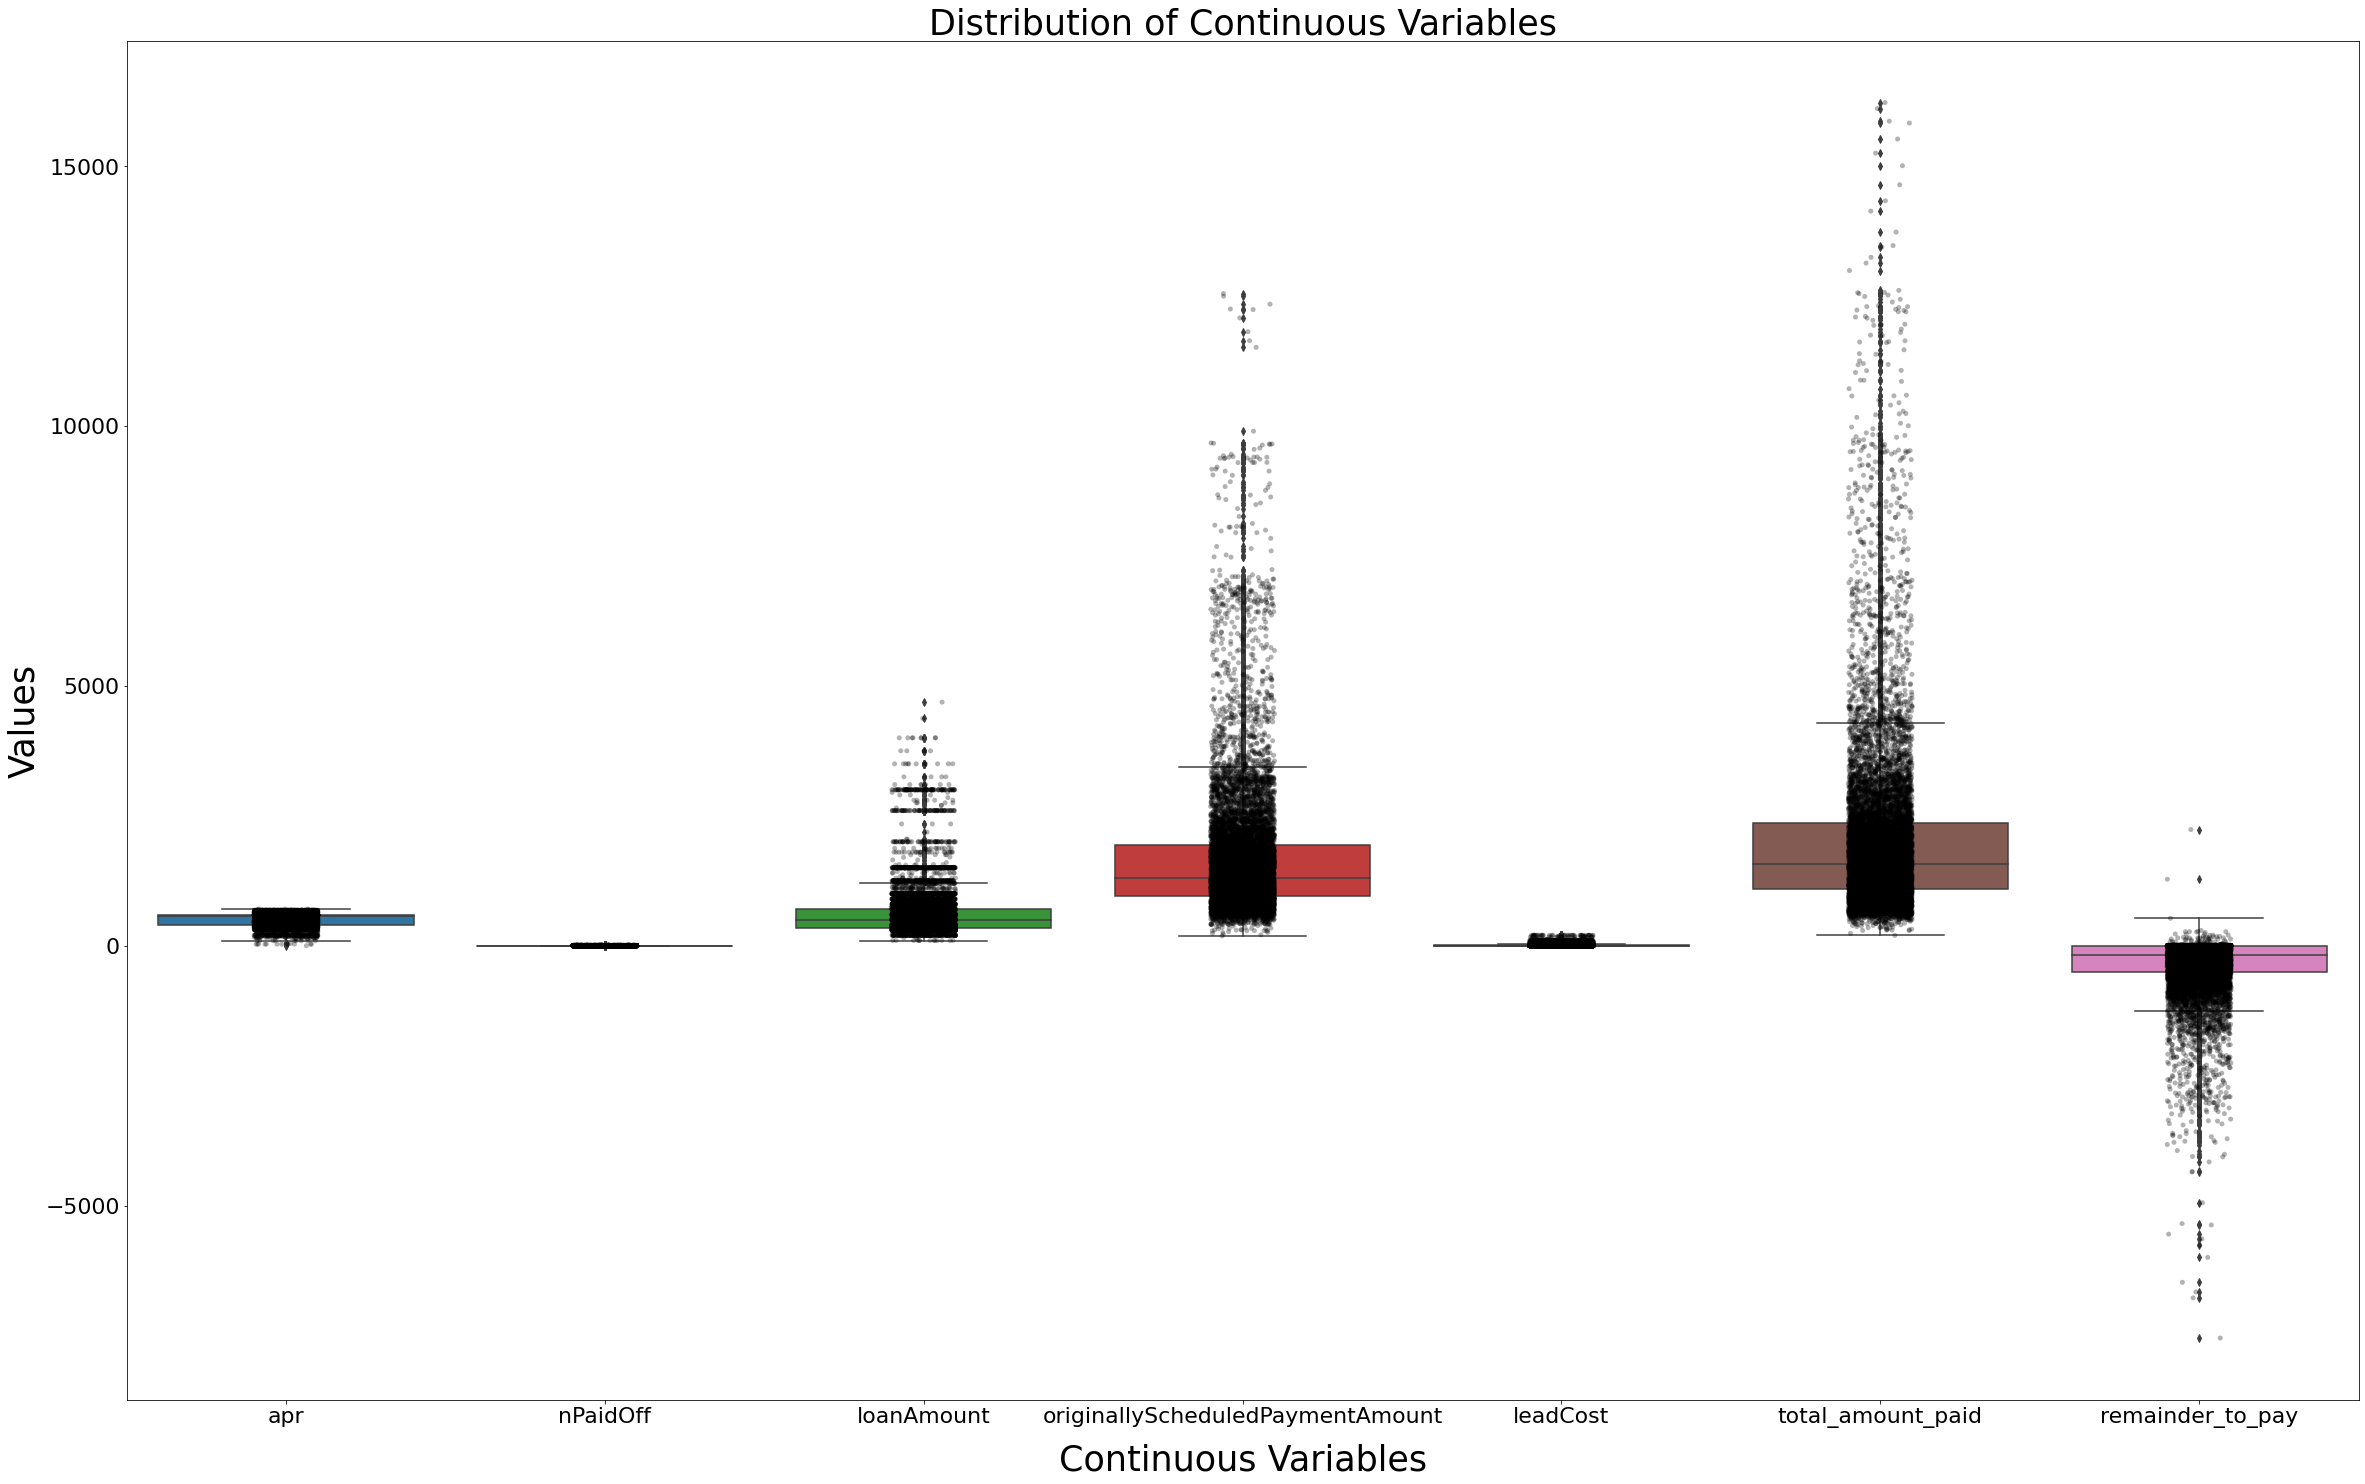

In [30]:
plt.figure(figsize=(40,25))    
boxplot = sns.boxplot(data=df_loan_paid[continous_variables], linewidth=1.5)
boxplot = sns.stripplot(data=df_loan_paid[continous_variables], marker="o", alpha=0.3, color="black")
boxplot.axes.set_title("Distribution of Continuous Variables", fontsize=35)
boxplot.set_xlabel("Continuous Variables", fontsize=35, labelpad=15)
boxplot.set_ylabel("Values", fontsize=35)
boxplot.tick_params(axis='both', labelsize=22)
plt.show()

In [ ]:
Most of the data is skewed which means we have to use normal distribution during modelling

In [31]:
df = pd.merge(df_loan_paid, df_clarity, left_on="clarityFraudId", right_on="underwritingid", how="left")

df.head(10)

index         loanId                          anon_ssn payFrequency    apr  \
0      0  LL-I-06644937  464f5d9ae4fa09ece4048d949191865c            B  199.0   
1     64  LL-I-16519347  bc9fa73468acf18cb968a3a6a3c4697c            S  490.0   
2     77  LL-I-11506719  10cefd11d41612b032fd9cd2debe32dc            B  590.0   
3     90  LL-I-09279047  1d249e27292d25e4d3b4bc142a2a4aea            W  404.1   
4    130  LL-I-01316580  2a10b2e04c5eec9a47a8cf5b9b81a2b8            W  590.0   
5    173  LL-I-04577739  edac6e371cda7512214ba74698247a19            B  601.0   
6    185  LL-I-07240030  7a2dabf0d9fe553dd4136b17e3dca40b            B  590.0   
7    328  LL-I-06082778  6f884e233bd17aadbda6c5bd2af2260c            B  625.0   
8    462  LL-I-08124999  593b6d3e35436bfab3e8e6312599f5d8            S  360.0   
9    617  LL-I-05805964  6649208bb9d31f34bcf071cc531132c1            B  360.0   

          applicationDate  originated          originatedDate  nPaidOff  \
0 2016-01-19 22:07:36.778        True 2016-01-20 15:49:18.846       0.0   
1 2017-01-31 17:48:17.381        True 2017-01-31 18:00:14.520       2.0   
2 2016-08-27 09:08:05.442        True 2016-08-29 15:05:04.014       0.0   
3 2016-05-25 03:05:18.849        True 2016-05-25 15:11:36.260       3.0   
4 2015-05-26 17:02:27.312        True 2015-05-26 18:45:48.024       0.0   
5 2015-11-12 21:07:03.953        True 2015-11-12 21:57:28.345       0.0   
6 2016-02-14 18:17:40.530        True 2016-02-17 18:41:15.519       0.0   
7 2015-12-26 16:30:14.247        True 2015-12-27 15:48:34.522       1.0   
8 2016-03-25 20:08:27.702        True 2016-03-25 20:57:33.780       3.0   
9 2015-12-16 18:43:31.248        True 2015-12-16 19:49:50.228       0.0   

   approved  ...  \
0      True  ...   
1      True  ...   
2      True  ...   
3      True  ...   
4      True  ...   
5      True  ...   
6      True  ...   
7      True  ...   
8      True  ...   
9      True  ...   

   .underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchtypedescription  \
0                                                NaN                                              
1                                   (M) Mobile Phone                                              
2                                          (P) Pager                                              
3                                   (M) Mobile Phone                                              
4                                                NaN                                              
5                                   (M) Mobile Phone                                              
6                                   (M) Mobile Phone                                              
7                                   (M) Mobile Phone                                              
8                                   (M) Mobile Phone                                              
9                                   (M) Mobile Phone                                              

  .underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchresult  \
0                                            partial                                      
1                                            partial                                      
2                                              match                                      
3                                              match                                      
4                                                NaN                                      
5                                            partial                                      
6                                              match                                      
7                                            partial                                      
8                                              match                                      
9                                              match            

In [32]:
df = pd.merge(df_loan_paid, df_clarity, left_on="clarityFraudId", right_on="underwritingid", how="left")

df.head(10)

index         loanId                          anon_ssn payFrequency    apr  \
0      0  LL-I-06644937  464f5d9ae4fa09ece4048d949191865c            B  199.0   
1     64  LL-I-16519347  bc9fa73468acf18cb968a3a6a3c4697c            S  490.0   
2     77  LL-I-11506719  10cefd11d41612b032fd9cd2debe32dc            B  590.0   
3     90  LL-I-09279047  1d249e27292d25e4d3b4bc142a2a4aea            W  404.1   
4    130  LL-I-01316580  2a10b2e04c5eec9a47a8cf5b9b81a2b8            W  590.0   
5    173  LL-I-04577739  edac6e371cda7512214ba74698247a19            B  601.0   
6    185  LL-I-07240030  7a2dabf0d9fe553dd4136b17e3dca40b            B  590.0   
7    328  LL-I-06082778  6f884e233bd17aadbda6c5bd2af2260c            B  625.0   
8    462  LL-I-08124999  593b6d3e35436bfab3e8e6312599f5d8            S  360.0   
9    617  LL-I-05805964  6649208bb9d31f34bcf071cc531132c1            B  360.0   

          applicationDate  originated          originatedDate  nPaidOff  \
0 2016-01-19 22:07:36.778        True 2016-01-20 15:49:18.846       0.0   
1 2017-01-31 17:48:17.381        True 2017-01-31 18:00:14.520       2.0   
2 2016-08-27 09:08:05.442        True 2016-08-29 15:05:04.014       0.0   
3 2016-05-25 03:05:18.849        True 2016-05-25 15:11:36.260       3.0   
4 2015-05-26 17:02:27.312        True 2015-05-26 18:45:48.024       0.0   
5 2015-11-12 21:07:03.953        True 2015-11-12 21:57:28.345       0.0   
6 2016-02-14 18:17:40.530        True 2016-02-17 18:41:15.519       0.0   
7 2015-12-26 16:30:14.247        True 2015-12-27 15:48:34.522       1.0   
8 2016-03-25 20:08:27.702        True 2016-03-25 20:57:33.780       3.0   
9 2015-12-16 18:43:31.248        True 2015-12-16 19:49:50.228       0.0   

   approved  ...  \
0      True  ...   
1      True  ...   
2      True  ...   
3      True  ...   
4      True  ...   
5      True  ...   
6      True  ...   
7      True  ...   
8      True  ...   
9      True  ...   

   .underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchtypedescription  \
0                                                NaN                                              
1                                   (M) Mobile Phone                                              
2                                          (P) Pager                                              
3                                   (M) Mobile Phone                                              
4                                                NaN                                              
5                                   (M) Mobile Phone                                              
6                                   (M) Mobile Phone                                              
7                                   (M) Mobile Phone                                              
8                                   (M) Mobile Phone                                              
9                                   (M) Mobile Phone                                              

  .underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchresult  \
0                                            partial                                      
1                                            partial                                      
2                                              match                                      
3                                              match                                      
4                                                NaN                                      
5                                            partial                                      
6                                              match                                      
7                                            partial                                      
8                                              match                                      
9                                              match            

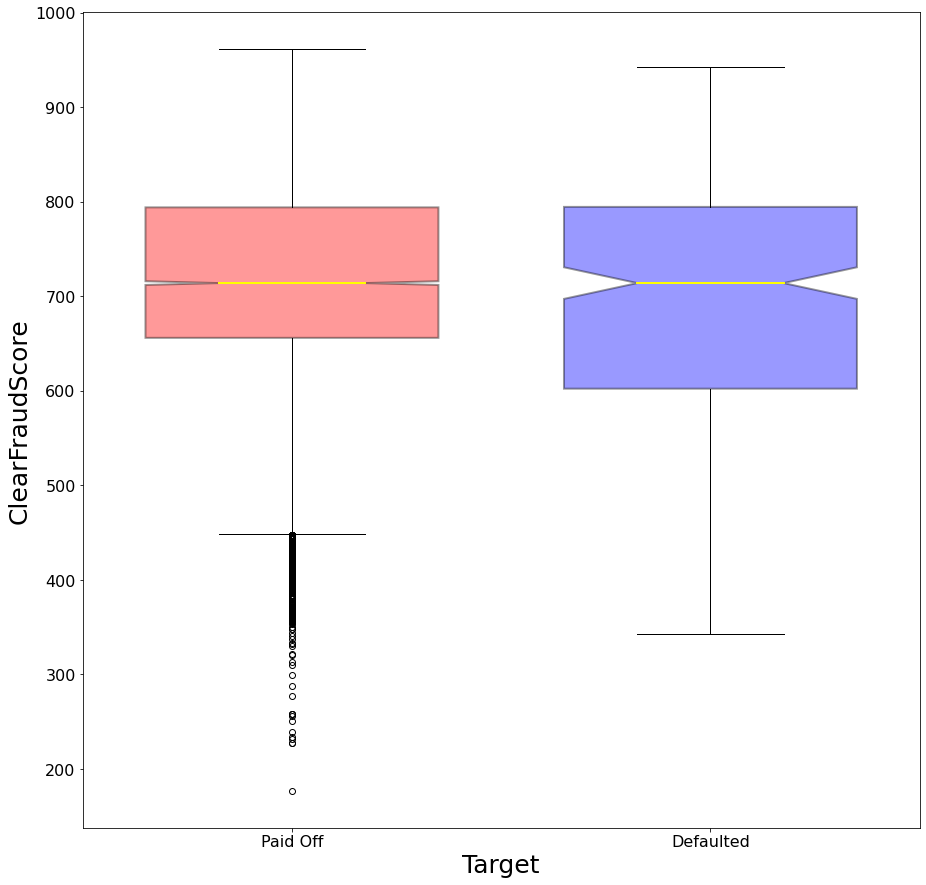

In [33]:
# Fill clearfraudscore with the mean value 
df['clearfraudscore'] = df['clearfraudscore'].fillna(value=df['clearfraudscore'].mean())

paid_off = df[df['target']==1.0]['clearfraudscore']
defaulted = df[df['target']==0.0]['clearfraudscore']

fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(111)
boxplots = ax.boxplot([paid_off,defaulted],
           notch = True,
           labels=['Paid Off', 'Defaulted'],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
          );

boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('red')

plt.xlabel('Target', fontsize = 25);
plt.ylabel('ClearFraudScore', fontsize = 25);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);

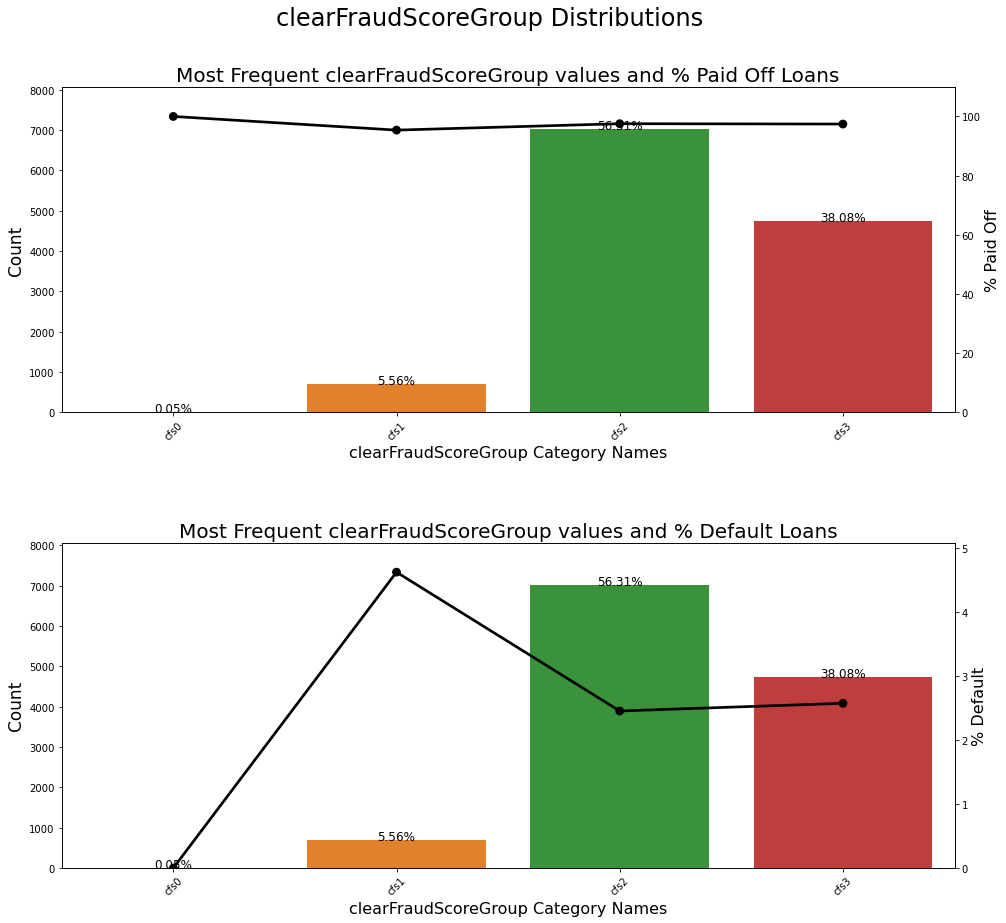

In [34]:
df['clearFraudScoreGroup'] = pd.cut(df['clearfraudscore'], bins=[0, 250, 500, 750,1000, float('Inf')], labels=['cfs0', 'cfs1', 'cfs2', 'cfs3', 'cfs4'])

#df.head(10)

plot_target_vs_col(df, 'clearFraudScoreGroup')

If I understand correctly the clear fraud score tells how  much its likely for a customer to be fraudulent , despite bining the customers in levels of clear fraud tehre is no relation with %default so its not veryu helpful when prdicting fruad or not 

# comparison of GDP with Loan 

In [35]:
path = "D:\int\DS Assessment (Intern)-20220525T081644Z-001\DS Assessment (Intern)\data\data\payment1.csv"

In [36]:
df_path= pd.read_csv(path)


df_path.head(10)

C:\Users\Zati Hakim\AppData\Local\Temp\ipykernel_592\29310915.py:1: DtypeWarning: Columns (8,11,56,57,58) have mixed types. Specify dtype option on import or set low_memory=False.
  df_path= pd.read_csv(path)


Unnamed: 0 state        GDP         loanId  \
0           0    AK  54,970.10  LL-I-12813448   
1           1    AK  54,970.10  LL-I-15016503   
2           2    AK  54,970.10  LL-I-13218554   
3           3    AK  54,970.10  LL-I-14764759   
4           4    AK  54,970.10  LL-I-12236476   
5           5    AK  54,970.10  LL-I-14218062   
6           6    AK  54,970.10  LL-I-14218062   
7           7    AK  54,970.10  LL-I-14218062   
8           8    AK  54,970.10  LL-I-14218062   
9           9    AK  54,970.10  LL-I-14218062   

                           anon_ssn payFrequency    apr  \
0  7cebd891139dd0a8ddaf38f7bce42eff            S  645.0   
1  1d241f842438f4ac29e2dd1b1085a31b            B  645.0   
2  aef98a90f1639556c5d96b62842c034f            B  645.0   
3  5caf9e9382f660a6c537bf941a9fac9b            B  645.0   
4  b9fc569a13902aaa629195213982f74d            B  590.0   
5  a06f1ef165d36f29d2757e38972f3a61            B  645.0   
6  a06f1ef165d36f29d2757e38972f3a61            B  645.0   
7  a06f1ef165d36f29d2757e38972f3a61            B  645.0   
8  a06f1ef165d36f29d2757e38972f3a61            B  645.0   
9  a06f1ef165d36f29d2757e38972f3a61            B  645.0   

           applicationDate originated           originatedDate  ...  \
0  2016-12-09 22:07:59.796      False                      NaN  ...   
1  2017-01-11 15:26:25.387      False                      NaN  ...   
2  2016-12-16 00:51:40.569      False                      NaN  ...   
3  2017-01-10 20:45:41.764      False                      NaN  ...   
4  2016-11-26 23:40:12.966      False                      NaN  ...   
5  2016-12-31 17:14:33.417       True  2017-01-05 21:58:51.617  ...   
6  2016-12-31 17:14:33.417       True  2017-01-05 21:58:51.617  ...   
7  2016-12-31 17:14:33.417       True  2017-01-05 21:58:51.617  ...   
8  2016-12-31 17:14:33.417       True  2017-01-05 21:58:51.617  ...   
9  2016-12-31 17:14:33.417       True  2017-01-05 21:58:51.617  ...   

   clearfraudscore            underwritingid  installmentIndex isCollection  \
0              NaN                       NaN               NaN          NaN   
1              NaN                       NaN               NaN          NaN   
2              NaN                       NaN               NaN          NaN   
3              NaN                       NaN               NaN          NaN   
4              NaN                       NaN               NaN          NaN   
5            695.0  5867e776e4b08f246ee3ed8a               1.0        False   
6            695.0  5867e776e4b08f246ee3ed8a               2.0        False   
7            695.0  5867e776e4b08f246ee3ed8a               3.0        False   
8            695.0  5867e776e4b08f246ee3ed8a               4.0        False   
9            695.0  5867e776e4b08f246ee3ed8a               5.0        False   

               paymentDate  principal    fees  paymentAmount paymentStatus  \
0                      NaN        NaN     NaN            NaN           NaN   
1                      NaN        NaN     NaN            NaN           NaN   
2                      NaN        NaN     NaN            NaN           NaN   
3                      NaN        NaN     NaN            NaN           NaN   
4                      NaN        NaN     NaN            NaN           NaN   
5  2017-01-18 05:00:00.000      29.91  148.44         178.35      Rejected   
6  2017-02-01 05:00:00.000      12.57  165.78         178.35      Rejected   
7  2017-02-15 05:00:00.000      15.68  162.67         178.35     Cancelled   
8  2017-03-01 05:00:00.000      19.56  158.79         178.35     Cancelled   
9  2017-03-15 04:00:00.000      24.40  153.95         178.35     Cancelled   

  paymentReturnCode  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  
5               R01  
6               R01  
7               NaN  
8               NaN  
9               NaN  

[10 rows x 83 columns]

In [37]:
print(list(df_path))
len(list(df_path))

['Unnamed: 0', 'state', 'GDP', 'loanId', 'anon_ssn', 'payFrequency', 'apr', 'applicationDate', 'originated', 'originatedDate', 'nPaidOff', 'approved', 'isFunded', 'loanStatus', 'loanAmount', 'originallyScheduledPaymentAmount', 'leadType', 'leadCost', 'fpStatus', 'clarityFraudId', 'hasCF', '.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago', '.underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago', '.underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago', '.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago', '.underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago', '.underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago', '.underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago', '.underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago', '.underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfivedaysago', '.underwritingdataclarity.clearfraud.clearfraudindicator.inqui

83

In [38]:
# df_path = df_path.dropna()
df_path.corr()

Unnamed: 0       apr  \
Unnamed: 0                                            1.000000  0.271060   
apr                                                   0.271060  1.000000   
nPaidOff                                             -0.017387 -0.129574   
isFunded                                             -0.046083 -0.134834   
loanAmount                                           -0.221510 -0.438093   
originallyScheduledPaymentAmount                     -0.204385 -0.257951   
leadCost                                              0.007320 -0.082335   
hasCF                                                -0.132653 -0.014424   
.underwritingdataclarity.clearfraud.clearfraudi...    0.096756  0.086619   
.underwritingdataclarity.clearfraud.clearfraudi...    0.089118  0.088907   
.underwritingdataclarity.clearfraud.clearfraudi...    0.005195  0.005761   
.underwritingdataclarity.clearfraud.clearfraudi...    0.085470  0.081528   
.underwritingdataclarity.clearfraud.clearfraudi...    0.093805  0.088473   
.underwritingdataclarity.clearfraud.clearfraudi...    0.097008  0.084922   
.underwritingdataclarity.clearfraud.clearfraudi...    0.071213  0.065030   
.underwritingdataclarity.clearfraud.clearfraudi...    0.096913  0.085921   
.underwritingdataclarity.clearfraud.clearfraudi...    0.043942  0.071185   
.underwritingdataclarity.clearfraud.clearfraudi...    0.035772  0.029972   
.underwritingdataclarity.clearfraud.clearfraudi...    0.004594  0.010261   
.underwritingdataclarity.clearfraud.clearfraudi...   -0.003256  0.043335   
clearfraudscore                                      -0.142342 -0.209899   
installmentIndex                                     -0.061974 -0.133321   
principal                                            -0.048828 -0.124103   
fees                                                 -0.064007  0.060409   
paymentAmount                                        -0.074099 -0.061608   

                                                    nPaidOff  isFunded  \
Unnamed: 0                                         -0.017387 -0.046083   
apr                                                -0.129574 -0.134834   
nPaidOff                                            1.000000  0.221981   
isFunded                                            0.221981  1.000000   
loanAmount                                          0.088188  0.177734   
originallyScheduledPaymentAmount                    0.065855  0.173218   
leadCost                                           -0.129029  0.106330   
hasCF                                              -0.192873  0.242688   
.underwritingdataclarity.clearfraud.clearfraudi... -0.020485  0.004935   
.underwritingdataclarity.clearfraud.clearfraudi... -0.056076  0.010219   
.underwritingdataclarity.clearfraud.clearfraudi... -0.034346 -0.017666   
.underwritingdataclarity.clearfraud.clearfraudi... -0.068336  0.008983   
.underwritingdataclarity.clearfraud.clearfraudi... -0.005772 -0.001896   
.underwritingdataclarity.clearfraud.clearfraudi... -0.041420  0.007991   
.underwritingdataclarity.clearfraud.clearfraudi... -0.060554 -0.003124   
.underwritingdataclarity.clearfraud.clearfraudi... -0.030112  0.007024   
.underwritingdataclarity.clearfraud.clearfraudi...  0.064748 -0.010452   
.underwritingdataclarity.clearfraud.clearfraudi... -0.005861  0.004892   
.underwritingdataclarity.clearfraud.clearfraudi...  0.001308  0.002167   
.underwritingdataclarity.clearfraud.clearfraudi... -0.024140  0.012392   
clearfraudscore                                     0.063107 -0.017632   
installmentIndex                                   -0.031633  0.011676   
principal                                           0.068131 -0.014528   
fees                                                0.042782 -0.007325   
paymentAmount                                       0.075604 -0.015033   

                                                    loanAmount  \
Unnamed: 0                                           -0.221510   
apr               

In [44]:
gdp = df_path['GDP'].str.replace(",","")
gdp = gdp.astype('float64')
gdp

0          54970.1
1          54970.1
2          54970.1
3          54970.1
4          54970.1
            ...   
1226964    41622.4
1226965    41622.4
1226966    41622.4
1226967    41622.4
1226968    41622.4
Name: GDP, Length: 1226969, dtype: float64

In [45]:
df_path['loanAmount']

0          400.0
1          500.0
2          600.0
3          500.0
4          400.0
           ...  
1226964    500.0
1226965    500.0
1226966    350.0
1226967    350.0
1226968    400.0
Name: loanAmount, Length: 1226969, dtype: float64

In [46]:
df_path['loanAmount'].corr(gdp)

0.35745712701664806

I checked for correlation between states with high GDP with amount of loan taken ,  but there seemes to be no correlation between thst GDP with loan amount 